In [ ]:
!pip install tf_pose

     |████████████████████████████████| 7.3MB 3.9MB/s 
     |████████████████████████████████| 71kB 8.2MB/s 
     |████████████████████████████████| 81kB 8.1MB/s 
     |████████████████████████████████| 110.5MB 90kB/s 
     |████████████████████████████████| 296kB 17.9MB/s 
     |████████████████████████████████| 512kB 17.5MB/s 
     |████████████████████████████████| 3.8MB 19.5MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
  Created wheel for tf-pose: filename=tf_pose-0.11.0-cp36-cp36m-linux_x86_64.whl size=7474898 sha256=3561ae41fd55227f69a5ff6248e3b365c4ffab244ff563c4464ba4eadf781e71
  Stored in directory: /root/.cache/pip/wheels/2b/ed/67/a63b2651779d6d295143eaad3d4d618c2b9aa0ace41f69f6c4
  Created wheel for dill: filename=dill-0.2.7.1-cp36-none-any.whl size=54544 sha256=dad17cdfa3194f2e16861fe2d35cd69b558f92f35696bacc0426305be0bbad8b
  Stored in directory: /root/.cache/pip/wheels/99/c4/ed/1b64d2d5809e60d5a3685530432f6159d6a9959739facb61f2
  Created wheel for fire: file

In [ ]:
import sys
import time
import logging
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tf_pose import common
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




In [ ]:
model='mobilenet_thin'
resize='432x368'
w, h = model_wh(resize)

In [ ]:
e = TfPoseEstimator(get_graph_path(model), target_size=(w, h))

[2020-12-06 06:16:57,035] [TfPoseEstimator] [INFO] loading graph from /usr/local/lib/python3.6/dist-packages/tf_pose_data/graph/mobilenet_thin/graph_opt.pb(default size=432x368)






TfPoseEstimator/MobilenetV1/Conv2d_0/weights
TfPoseEstimator/image
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_0/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_0/Relu
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Relu
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/Conv2D_bn_offset
TfPoseEstimat

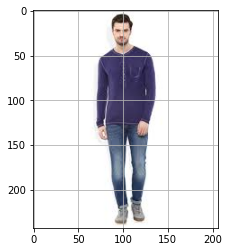

In [ ]:
image_path = "download.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.grid();

In [ ]:
image.shape

(243, 207, 3)

In [ ]:
image = common.read_imgfile(image_path, None, None)

In [ ]:
humans = e.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)

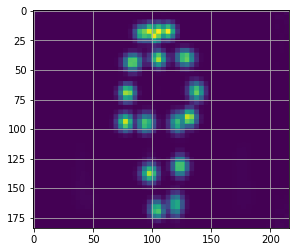

In [ ]:
max_prob = np.amax(e.heatMat[:, :, :-1], axis=2)
plt.imshow(max_prob)
plt.grid();

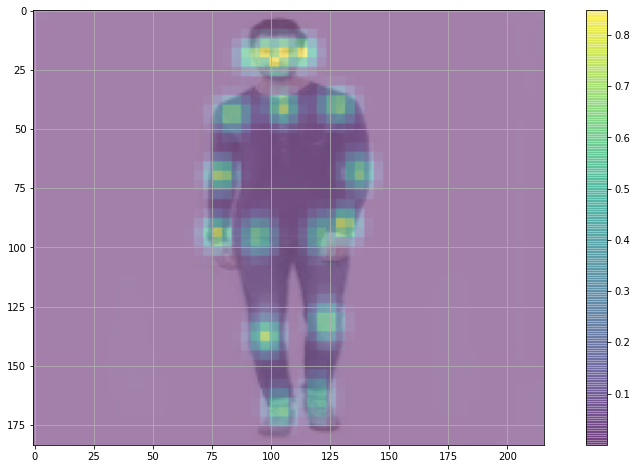

In [ ]:
plt.figure(figsize=(15,8))
bgimg = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2RGB)
bgimg = cv2.resize(bgimg, (e.heatMat.shape[1], e.heatMat.shape[0]), interpolation=cv2.INTER_AREA)
plt.imshow(bgimg, alpha=0.5)
plt.imshow(max_prob, alpha=0.5)
plt.colorbar()
plt.grid();

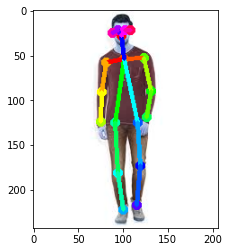

In [ ]:
image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)
plt.imshow(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 206.5, 242.5, -0.5)

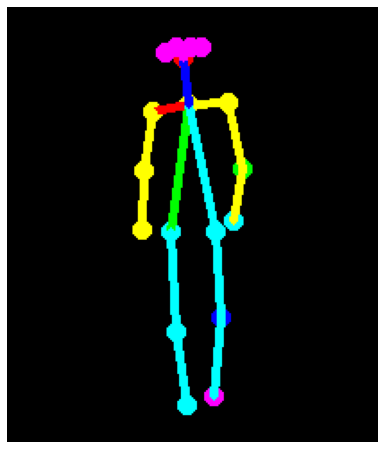

In [ ]:
image = common.read_imgfile(image_path, None, None)
humans = e.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)
black_background = np.zeros(image.shape)
skeleton = TfPoseEstimator.draw_humans(black_background, humans, imgcopy=False)
plt.figure(figsize=(15,8))
plt.imshow(skeleton);
plt.grid(); 
plt.axis("off")


In [ ]:
def plot_img(image, axis=False, grid=False, showBG = True):
    plt.figure(figsize=(15,8))
    if showBG:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image);
    if grid == True:
        plt.grid();
    if axis == False:       
        plt.axis('off');

In [ ]:
def get_human_pose(image_path, showBG = True):
    image = common.read_imgfile(image_path, None, None)
    image=cv2.resize(image,(920,590))#extra
    if image is None:
        logger.error('Image can not be read, path=%s' % image)
        sys.exit(-1)

    t = time.time()
    
    humans = e.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)
    elapsed = time.time() - t

    #logger.info('inference image: %s in %.4f seconds.' % (image, elapsed))
    if showBG == False:
        image = np.zeros(image.shape)
    image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)
    return image, humans

In [ ]:
def show_heatmap(image):
    bgimg = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2RGB)
    bgimg = cv2.resize(bgimg, (e.heatMat.shape[1], e.heatMat.shape[0]), interpolation=cv2.INTER_AREA)

    plt.figure(figsize=(15,8))
    plt.imshow(bgimg, alpha=0.5)
    tmp = np.amax(e.heatMat[:, :, :-1], axis=2)
    plt.imshow(tmp, cmap=plt.cm.gray, alpha=0.5)
    plt.colorbar()
    plt.axis('off');

In [ ]:
def show_vectormaps(image):
    tmp2 = e.pafMat.transpose((2, 0, 1))
    tmp2_odd = np.amax(np.absolute(tmp2[::2, :, :]), axis=0)
    tmp2_even = np.amax(np.absolute(tmp2[1::2, :, :]), axis=0)
    
    fig = plt.figure(figsize=(20,15))

    a = fig.add_subplot(2, 2, 3)
    a.set_title('Vectormap-x')
    # plt.imshow(CocoPose.get_bgimg(inp, target_size=(vectmap.shape[1], vectmap.shape[0])), alpha=0.5)
    plt.imshow(tmp2_odd, cmap=plt.cm.gray, alpha=0.5)
    plt.colorbar()

    a = fig.add_subplot(2, 2, 4)
    a.set_title('Vectormap-y')
    # plt.imshow(CocoPose.get_bgimg(inp, target_size=(vectmap.shape[1], vectmap.shape[0])), alpha=0.5)
    plt.imshow(tmp2_even, cmap=plt.cm.gray, alpha=0.5)
    plt.colorbar()
    plt.show()

In [ ]:
import math
def show_keypoints(image, hum, human=1, color='orange', showBG = True):
    if human == 0: human = 1
    num_hum = len(hum)
    keypoints = str(str(str(hum[human-1]).split('BodyPart:')[1:]).split('-')).split(' score=')
    keypoints_list=[]
    for i in range (len(keypoints)-1): 
        pnt = keypoints[i][-11:-1]
        pnt = tuple(map(float, pnt.split(', ')))
        keypoints_list.append(pnt)

    keypts_array = np.array(keypoints_list)
    keypts_array = keypts_array*(image.shape[1],image.shape[0])
    keypts_array = keypts_array.astype(int)
    keypts_array
    if abs(keypts_array[2][1]-keypts_array[4][1])<=20:
        x=int((keypts_array[2][0]+keypts_array[4][0])/2)
        y=int((keypts_array[2][1]+keypts_array[4][1])/2)
        center_coordinates=(x,y)
        x1=keypts_array[0][0]
        y1=keypts_array[0][1]
        d=((x-x1)*(x-x1))+((y-y1)+(y-y1))
        p=math.sqrt(d)
        radius=int(p)
        color='c'
        thickness=2
        image = cv2.circle(image, center_coordinates, radius,(0,0,255),thickness)   
    plt.figure(figsize=(10,10))
    plt.axis([0, image.shape[1], 0, image.shape[0]])  
    plt.scatter(*zip(*keypts_array), s=200, color=color, alpha=0.6)
    if showBG:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)      
    plt.imshow(image)
    ax=plt.gca() 
    ax.set_ylim(ax.get_ylim()[::-1]) 
    ax.xaxis.tick_top() 
    plt.title('Keypoints Person [{}] from {} humans detected\n'.format(human, num_hum))
    plt.grid();

    for i, txt in enumerate(keypts_array):
        ax.annotate(i, (keypts_array[i][0]-5, keypts_array[i][1]+5))
       
    return keypts_array

In [ ]:
logger = logging.getLogger('TfPoseEstimatorRun')
logger.handlers.clear()
logger.setLevel(logging.DEBUG)
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)
formatter = logging.Formatter('[%(asctime)s] [%(name)s] [%(levelname)s] %(message)s')
ch.setFormatter(formatter)
logger.addHandler(ch)

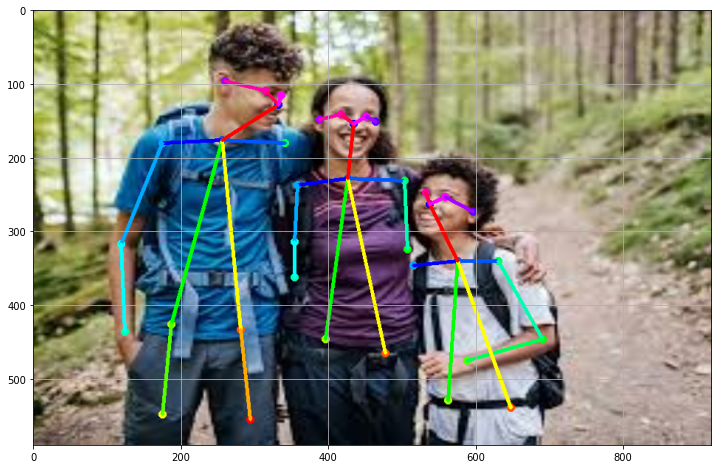

In [ ]:
image_path = 'many.jpg'
img, hum = get_human_pose(image_path)
plot_img(img, axis=True, grid=True)


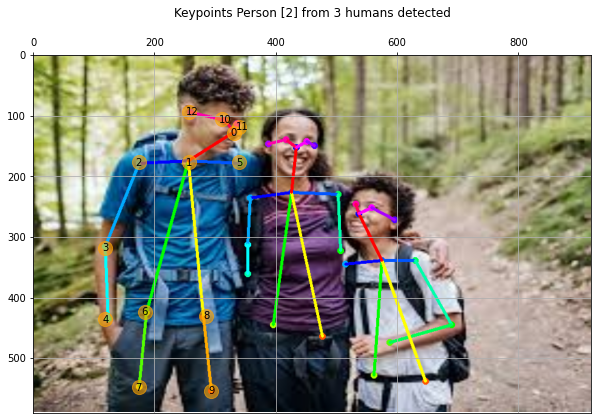

In [ ]:
keypoints_3 = show_keypoints(img, hum, 2
                             )

In [ ]:
keypoints_3

array([[150,  87],
       [160, 112],
       [145, 114],
       [178, 112],
       [194, 147],
       [165, 155],
       [157, 174],
       [181, 176],
       [150,  81],
       [157,  83],
       [168,  89]])

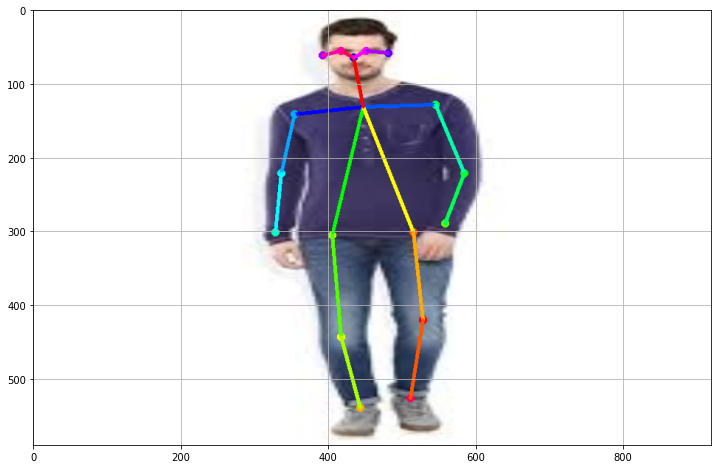

In [ ]:
image_path = 'download.jpg'
img, hum = get_human_pose(image_path)
plot_img(img, axis=True, grid=True)

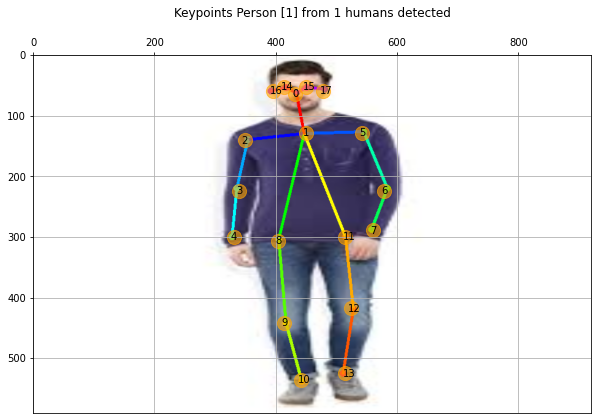

In [ ]:
keypoints_3 = show_keypoints(img, hum, 1
                             )

In [ ]:
keypoints_3

array([[460,  88],
       [506, 147],
       [432, 135],
       [322, 165],
       [386, 118],
       [570, 153],
       [598, 236],
       [579, 306],
       [432, 295],
       [414, 383],
       [404, 466],
       [515, 300],
       [515, 389],
       [515, 454],
       [460,  70],
       [487,  70],
       [524,  82]])

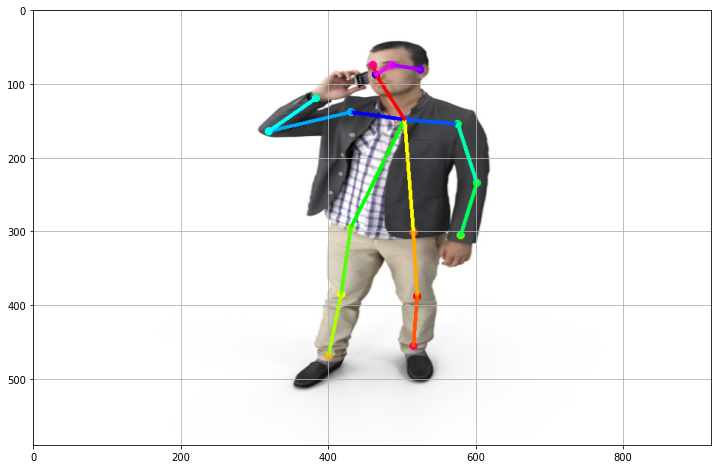

In [ ]:
image_path = 'mobile2.jpg'
img, hum = get_human_pose(image_path)
plot_img(img, axis=True, grid=True)

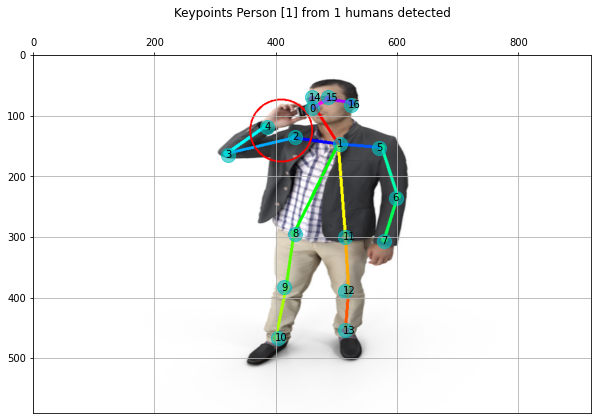

In [ ]:
keypoints_3 = show_keypoints(img, hum, 1
                             )

In [ ]:
keypoints_3

array([[300,  90],
       [330, 156],
       [282, 138],
       [210, 168],
       [252, 120],
       [372, 156],
       [390, 240],
       [378, 312],
       [282, 300],
       [270, 390],
       [264, 474],
       [336, 306],
       [336, 396],
       [336, 462],
       [300,  72],
       [318,  72],
       [341,  84]])

In [ ]:
keypoints_3[4][0]-keypoints_3[2][0]

-30

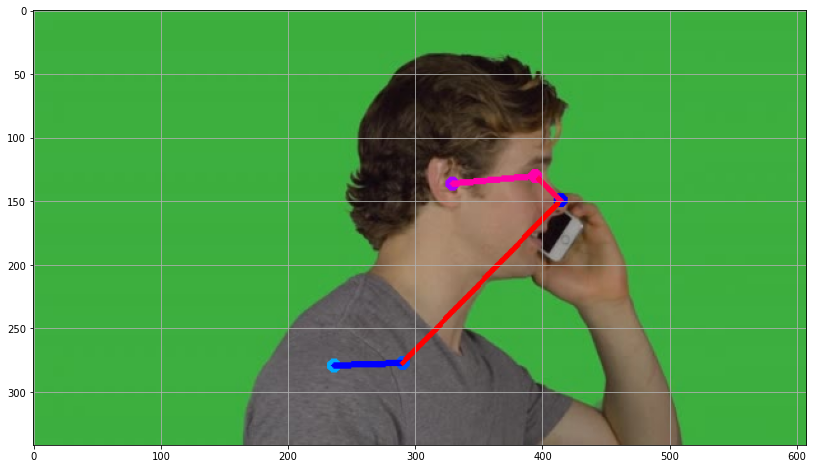

In [ ]:
image_path = 'mobile3.jpg'
img, hum = get_human_pose(image_path)
plot_img(img, axis=True, grid=True)

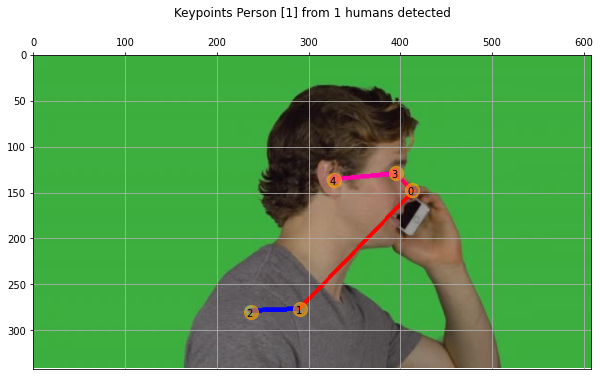

In [ ]:
keypoints_3 = show_keypoints(img, hum, 1
                             )

In [ ]:
keypoints_3


array([[413, 147],
       [291, 277],
       [237, 280],
       [395, 129],
       [328, 136]])

In [ ]:
import time
import logging
import numpy as np
import cv2

from tf_pose import common
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh
from google.colab.patches import cv2_imshow

In [ ]:
video_path = 'video_0002.mp4'
showBG = True # False to show skeleton only.

In [ ]:
cap = cv2.VideoCapture(video_path)
if cap.isOpened() is False:
    print("Error opening video stream or file")

In [ ]:
fps_time = 0
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video=cv2.VideoWriter('out_video002.avi', fourcc, 1,(920,590))
while True:
    ret_val, image = cap.read()

    humans = e.inference(image,
                         resize_to_default=(w > 0 and h > 0),
                         upsample_size=4.0)
    if not showBG:
        image = np.zeros(image.shape)
    image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)
    img=cv2.resize(image,(920,590))
    cv2.putText(img, "FPS: %f" % (1.0 / (time.time() - fps_time)), (10, 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    cv2_imshow( img)
    video.write(img)
    fps_time = time.time()
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
#humans[0]
hum=1
num_hum = len(humans)
keypoints = str(str(str(humans[hum-1]).split('BodyPart:')[1:]).split('-')).split(' score=')
keypoints_list=[]
for i in range (len(keypoints)-1): 
    pnt = keypoints[i][-11:-1]
    pnt = tuple(map(float, pnt.split(', ')))
    keypoints_list.append(pnt)
keypts_array = np.array(keypoints_list)
#keypts_array = keypts_array*(image.shape[1],image.shape[0])
#keypts_array = keypts_array.astype(int)
keypts_array

array([[0.26, 0.61],
       [0.27, 0.61],
       [0.28, 0.62],
       [0.26, 0.64],
       [0.26, 0.67],
       [0.26, 0.71],
       [0.27, 0.64],
       [0.26, 0.67],
       [0.26, 0.71]])

In [ ]:
humans

[BodyPart:1-(0.26, 0.61) score=0.22 BodyPart:5-(0.27, 0.61) score=0.21 BodyPart:6-(0.28, 0.62) score=0.15 BodyPart:8-(0.26, 0.64) score=0.25 BodyPart:9-(0.26, 0.67) score=0.21 BodyPart:10-(0.26, 0.71) score=0.20 BodyPart:11-(0.27, 0.64) score=0.23 BodyPart:12-(0.26, 0.67) score=0.21 BodyPart:13-(0.26, 0.71) score=0.15]

In [ ]:
video_path = 'video_0070.mp4'
showBG = True # False to show skeleton only.
cap = cv2.VideoCapture(video_path)
if cap.isOpened() is False:
    print("Error opening video stream or file")
fps_time = 0
while True:
    ret_val, image = cap.read()

    humans = e.inference(image,
                         resize_to_default=(w > 0 and h > 0),
                         upsample_size=4.0)
    if not showBG:
        image = np.zeros(image.shape)
    image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)
    img=cv2.resize(image,(920,590))
    cv2.putText(img, "FPS: %f" % (1.0 / (time.time() - fps_time)), (10, 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    cv2_imshow( img)
    fps_time = time.time()
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Error opening video stream or file


Exception: ignored

In [ ]:
import sys
import time
import logging
import numpy as np
import cv2

from tf_pose import common
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh
import matplotlib.pyplot as plt

In [ ]:
# optional 
logger = logging.getLogger('TfPoseEstimator-WebCam')
logger.setLevel(logging.DEBUG)
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)
formatter = logging.Formatter('[%(asctime)s] [%(name)s] [%(levelname)s] %(message)s')
ch.setFormatter(formatter)
logger.addHandler(ch)

In [ ]:
fps_time = 0

In [ ]:
def str2bool(v):
    return v.lower() in ("yes", "true", "t", "1")

In [ ]:
camera = 1
resize = '432x368'     # resize images before they are processed
resize_out_ratio = 4.0 # resize heatmaps before they are post-processed
model = 'mobilenet_thin'
show_process = False
tensorrt = False       # for tensorrt process

In [ ]:
#logger.debug('cam read+')
cam = cv2.VideoCapture(camera)
cam.set(3, w)
cam.set(4, h)
#logger.info('cam image=%dx%d' % (image.shape[1], image.shape[0]))

False